In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df = df[5::6]

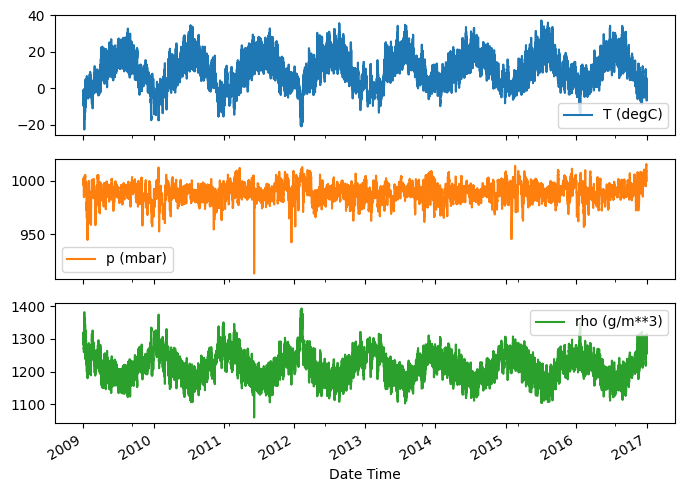

In [4]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

columnas = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
df_representar = df[columnas]
df_representar.index = date_time
_ = df_representar.plot(subplots=True)

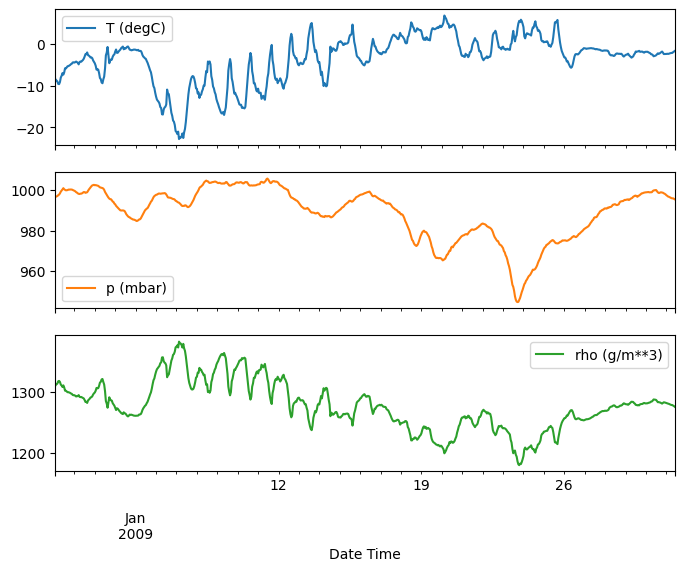

In [5]:
df_mes = df[columnas][:730]
df_mes.index = date_time[:730]
_ = df_mes.plot(subplots=True)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [7]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

#Para convertir de grados a radianes, multiplica el número de grados por π/180
wd_rad = df.pop('wd (deg)')*np.pi /180
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

In [8]:
max_wv = df.pop('max. wv (m/s)')
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

In [9]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.600000,984.200000,989.570000,994.720000,1015.290000
T (degC),70091.0,9.450482,8.423384,-22.760000,3.350000,9.410000,15.480000,37.280000
Tpot (K),70091.0,283.493086,8.504424,250.850000,277.440000,283.460000,289.530000,311.210000
Tdew (degC),70091.0,4.956471,6.730081,-24.800000,0.240000,5.210000,10.080000,23.060000
rh (%),70091.0,76.009788,16.474920,13.880000,65.210000,79.300000,89.400000,100.000000
VPmax (mbar),70091.0,13.576576,7.739883,0.970000,7.770000,11.820000,17.610000,63.770000
VPact (mbar),70091.0,9.533968,4.183658,0.810000,6.220000,8.860000,12.360000,28.250000
VPdef (mbar),70091.0,4.042536,4.898549,0.000000,0.870000,2.190000,5.300000,46.010000
sh (g/kg),70091.0,6.022560,2.655812,0.510000,3.920000,5.590000,7.800000,18.070000
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.810000,6.290000,8.960000,12.490000,28.740000


In [10]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [11]:
day = 24*60*60
year = 365.2425*day

df['day sin'] = np.sin(timestamp_s * (2*np.pi / day))
df['day cos'] =  np.cos(timestamp_s * (2*np.pi / day))
df['year sin'] = np.sin(timestamp_s * (2*np.pi / year))
df['year cos'] =  np.cos(timestamp_s * (2*np.pi / year))



In [12]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),Wx,Wy,max Wx,max Wy,day sin,day cos,year sin,year cos
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,-0.855154,-0.160038,-1.336792,-0.250174,-0.953717,0.300706,0.006900,0.999976
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,-0.716196,-0.726267,-1.348134,-1.367090,-0.843391,0.537300,0.007617,0.999971
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,-0.661501,0.257908,-1.453438,0.566672,-0.675590,0.737277,0.008334,0.999965
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,-0.280621,-0.209169,-0.545207,-0.406385,-0.461749,0.887011,0.009050,0.999959


Text(0.5, 1.0, 'Tiempod del día (señal)')

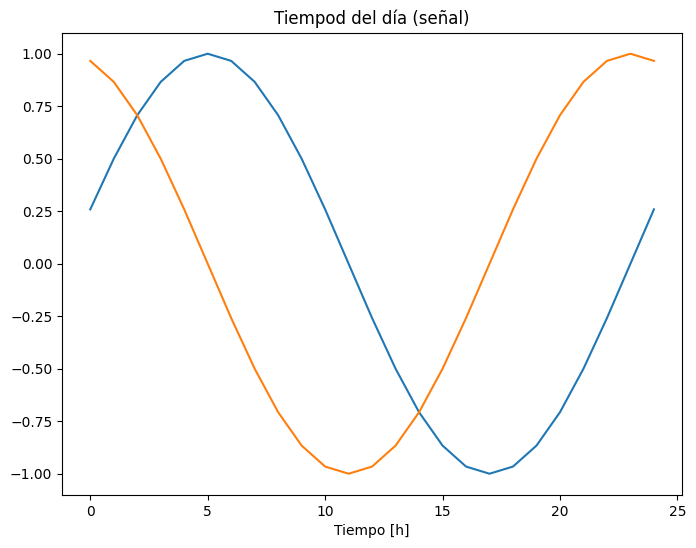

In [13]:
plt.plot(np.array(df['day sin'])[:25])
plt.plot(np.array(df['day cos'])[:25])
plt.xlabel('Tiempo [h]')
plt.title('Tiempod del día (señal)')

El tiempo en un formato de fecha tampoco es la formá más optima de introducirlo dentro del modelo, para ello comenzaremos convirtiéndolo en segundos. Además, como los valores anteriores, tenemos perioicidad, como mensual y anual. Vamos a utilizar las funciones de seno y coseno para representar perioicidad.

Tenemos los datos que necesitamos. Ahora dividirlos :-)
70%
20%
10%

NOOOOOOOOOOOO, porque perderíamos la continuidad de los datos :-)

In [14]:
lon = len(df)

In [15]:
train_df=df[0:int(lon*0.7)]

In [16]:
val_df=df[int(lon*0.7):int(lon*0.9)]

In [17]:
test_df=df[int(lon*0.9):]

In [18]:
train_df.shape

(49063, 20)

In [19]:
val_df.shape

(14018, 20)

In [20]:
test_df.shape

(7010, 20)

In [21]:
df.shape

(70091, 20)

Normalizamos los datos

 La normalización es una forma común de hacer esta escala: restar la media y dividir por la desviación estándar de cada característica.

In [22]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [23]:
print(train_df)

        p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  VPmax (mbar)  \
5       0.945308 -1.982473 -2.041888    -1.918973  1.117102     -1.302851   
11      0.959770 -2.078372 -2.138166    -2.060964  1.044617     -1.330143   
17      0.986284 -2.070284 -2.132435    -2.045187  1.062738     -1.328843   
23      1.004362 -2.098014 -2.161090    -2.096820  1.008375     -1.336641   
29      1.061006 -2.165028 -2.232152    -2.187178  0.984214     -1.353535   
...          ...       ...       ...          ...       ...           ...   
294353  0.169167  0.904892  0.886564     1.571997  0.947972      0.776492   
294359  0.266787  0.879473  0.853325     1.405624  0.621793      0.742703   
294365  0.217374  0.740824  0.719224     1.425703  1.086900      0.559461   
294371  0.213759  0.710783  0.689423     1.412795  1.147303      0.521772   
294377  0.166757  0.653013  0.636700     1.352556  1.177505      0.450295   

        VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3

<ipython-input-24-701a3895551d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(df.keys(), rotation=90)


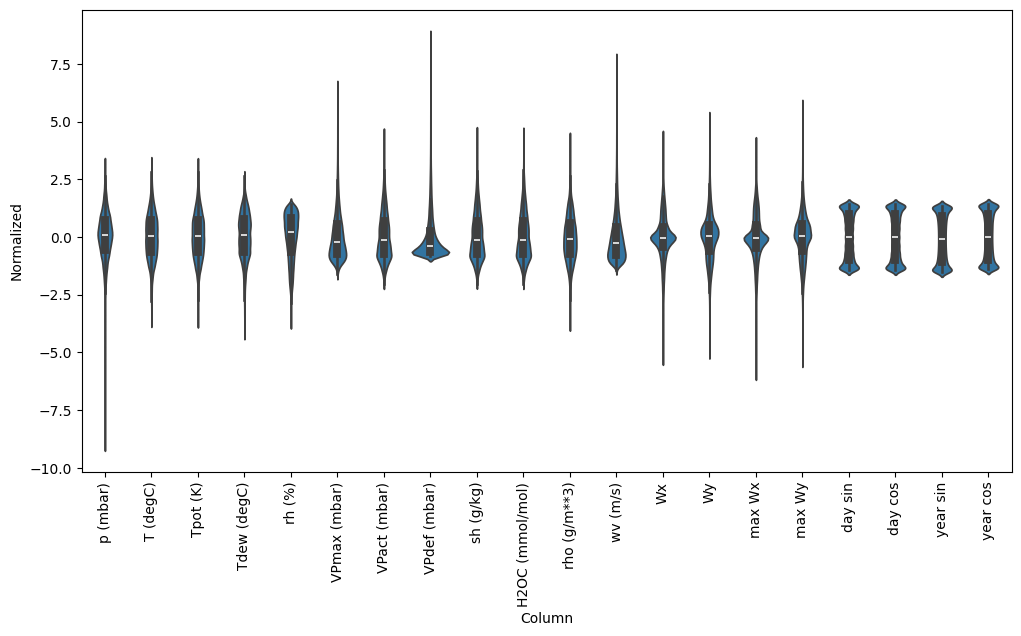

In [24]:
#Vamos a dibujar como nos ha quedado la cosa
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [25]:
class WindowGenerator:
  def __init__(
      self,
      input_width: int,
      label_width: int,
      shift: int,
      train_df: pd.DataFrame =train_df,
      val_df: pd.DataFrame=val_df,
      test_df: pd.DataFrame=test_df,
      labels_columns: list[str] = None
    ) -> None:
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.labels_columns = labels_columns
    if labels_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(labels_columns)}

    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.total_window_size = input_width + shift
    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.labels_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self) -> str:
      return '\n'.join([
          f'Tamaño total de la ventana: {self.total_window_size}',
          f'Índices de entrada: {self.input_indices}',
          f'Índices de salida: {self.labels_indices}',
          f'Columnas de salida: {self.labels_columns}'
      ])

In [26]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=1, labels_columns=['T (degC)'])
w1

Tamaño total de la ventana: 25
Índices de entrada: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Índices de salida: [24]
Columnas de salida: ['T (degC)']

In [27]:
w2 = WindowGenerator(input_width=6, label_width=2, shift=2, labels_columns=['T (degC)'])
w2

Tamaño total de la ventana: 8
Índices de entrada: [0 1 2 3 4 5]
Índices de salida: [6 7]
Columnas de salida: ['T (degC)']

In [28]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])
  if self.labels_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.labels_columns],
        axis=-1)
  return inputs, labels

WindowGenerator.split_window = split_window

In [29]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100: 100+w2.total_window_size]),
                           np.array(train_df[200: 200+w2.total_window_size])
                           ])

In [30]:
example_inputs, example_labels = w2.split_window(example_window)

In [31]:
example_window.shape, example_inputs.shape, example_labels.shape

(TensorShape([3, 8, 20]), TensorShape([3, 6, 20]), TensorShape([3, 2, 1]))

In [32]:
w2.example = example_inputs, example_labels

In [37]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.labels_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.labels_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.labels_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

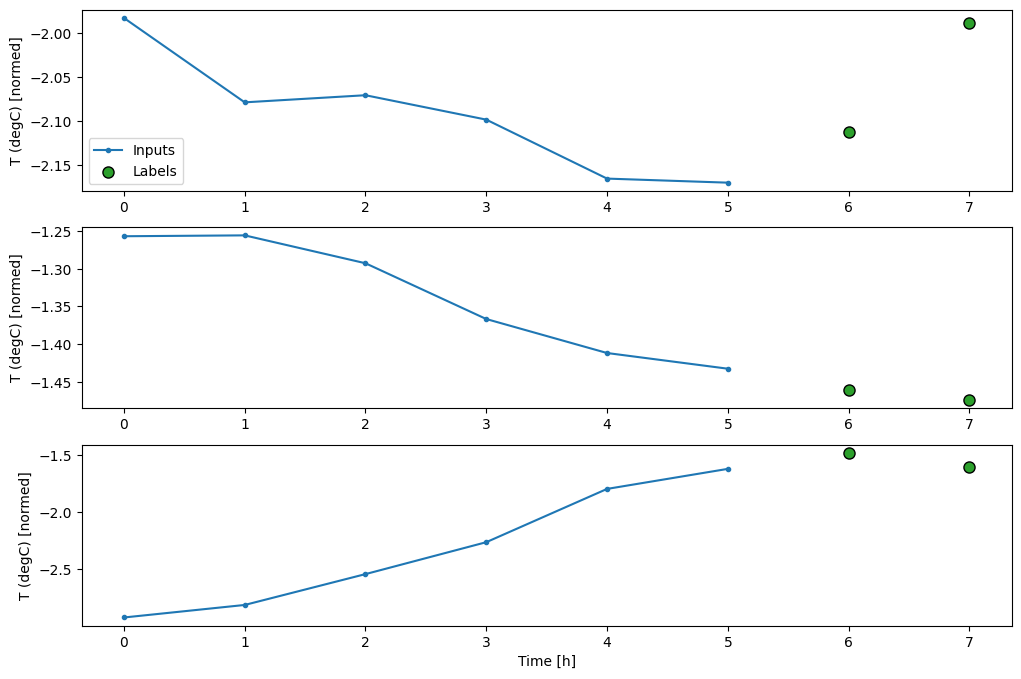

In [38]:
w2.plot()

In [47]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)
  ds = ds.map(self.split_window)
  return ds

WindowGenerator.make_dataset = make_dataset

In [48]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [49]:
single_step_window = WindowGenerator(
    input_width=1,
    label_width=1,
    shift=1,
    labels_columns=['T (degC)'])
single_step_window

Tamaño total de la ventana: 2
Índices de entrada: [0]
Índices de salida: [1]
Columnas de salida: ['T (degC)']

In [50]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index
  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [51]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}
baseline = Baseline(label_index = column_indices['T (degC)'])

In [52]:
wide_window = WindowGenerator(
    input_width = 24,
    label_width = 24,
    shift = 1,
    labels_columns = ['T (degC)']
)

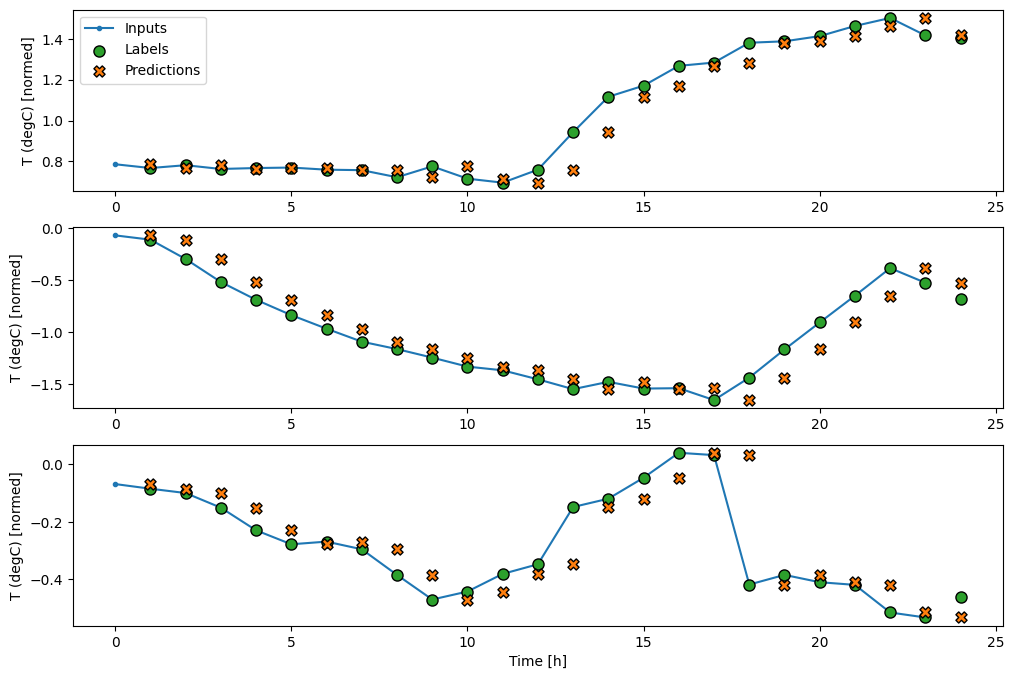

In [53]:
wide_window.plot(baseline)

In [59]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])
MAX_EPOCHS= 1
def compile_and_fit(model, window, patience =2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, mode = "min")
  model.compile(loss= tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam(), metrics = tf.metrics.MeanAbsoluteError())
  history = model.fit(window.train, epochs = MAX_EPOCHS, validation_data = window.val, callbacks=[early_stopping])
  return history

In [60]:
history = compile_and_fit(linear, single_step_window)

1534/1534 [==============================] - 9s 5ms/step - loss: 0.5667 - mean_absolute_error: 0.4189 - val_loss: 0.0330 - val_mean_absolute_error: 0.1359


In [61]:
val_performance, test_preformrance = {}, {}

In [62]:
val_performance['Linear'] = linear.evaluate(single_step_window.val)

439/439 [==============================] - 2s 5ms/step - loss: 0.0330 - mean_absolute_error: 0.1359


In [65]:
test_preformrance['Linear'] = linear.evaluate(single_step_window.test)

220/220 [==============================] - 1s 5ms/step - loss: 0.0315 - mean_absolute_error: 0.1370


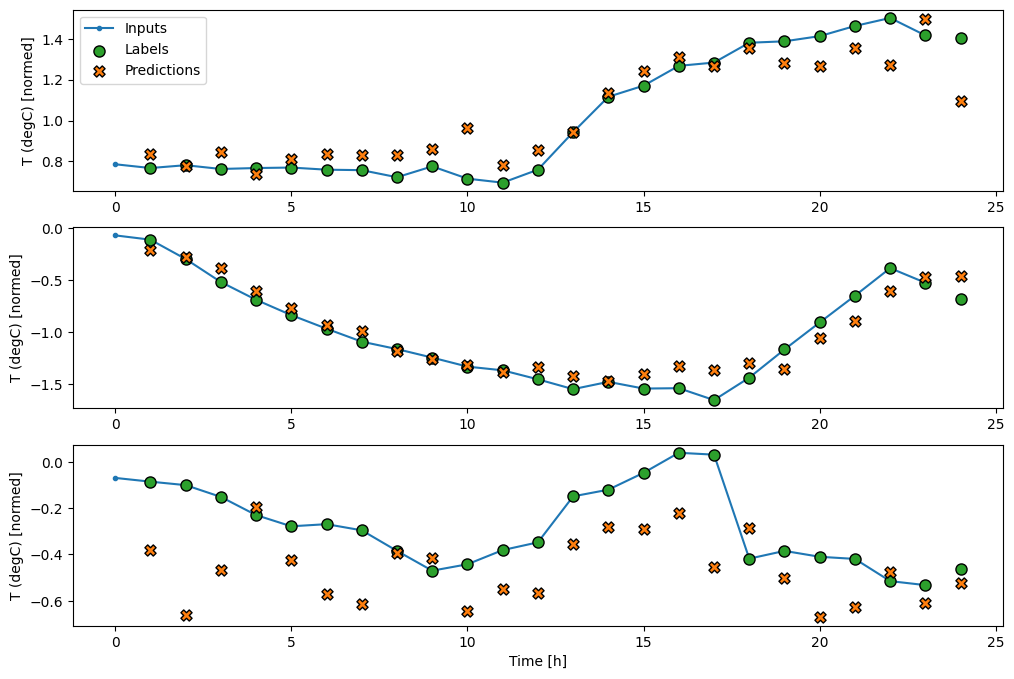

In [66]:
wide_window.plot(linear)

In [67]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = "relu"),
    tf.keras.layers.Dense(units = 64, activation = "relu"),
    tf.keras.layers.Dense(units = 1),
])

history2 = compile_and_fit(dense, single_step_window)
val_performance['Dense'] = dense.evaluate(single_step_window.val)
test_preformrance['Dense'] = dense.evaluate(single_step_window.test)

220/220 [==============================] - 1s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0705


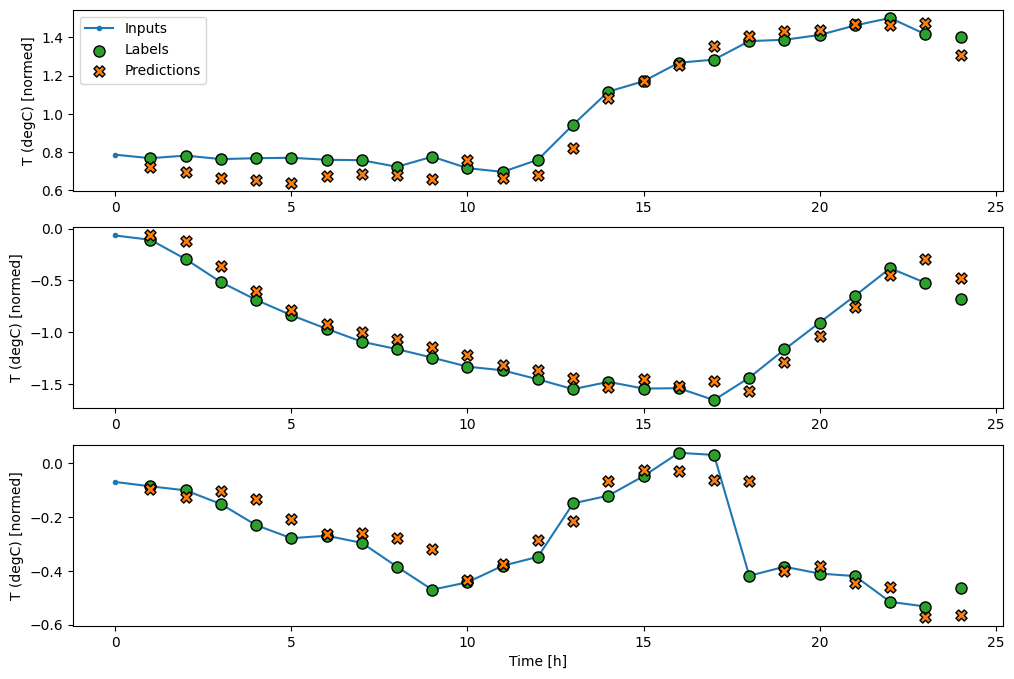

In [68]:
wide_window.plot(dense)

In [71]:
conv_width = 3
conv_window = WindowGenerator(
    input_width = 3,
    label_width = 1,
    shift = 1,
    labels_columns = ["T (degC)"]
)
conv_window

Tamaño total de la ventana: 4
Índices de entrada: [0 1 2]
Índices de salida: [3]
Columnas de salida: ['T (degC)']

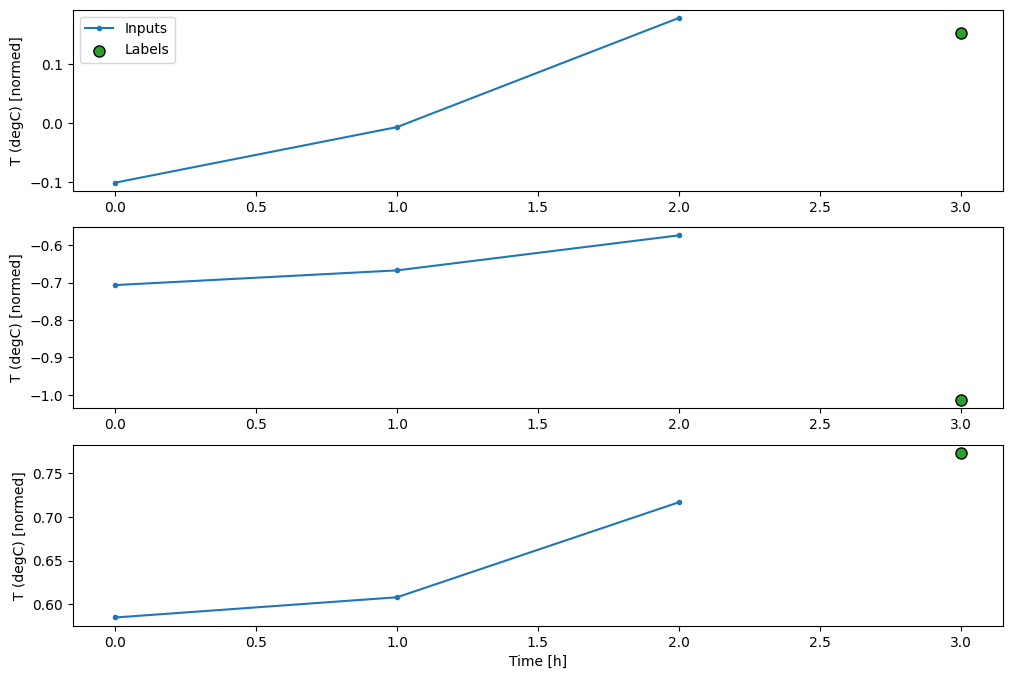

In [72]:
conv_window.plot()

In [73]:
multi_step_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1,-1])
])

In [74]:
history = compile_and_fit(multi_step_dense, conv_window)
val_performance['Multi Step Dense'] = multi_step_dense.evaluate(conv_window.val)
test_preformrance['Multi Step Dense'] = multi_step_dense.evaluate(conv_window.test)

219/219 [==============================] - 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0675


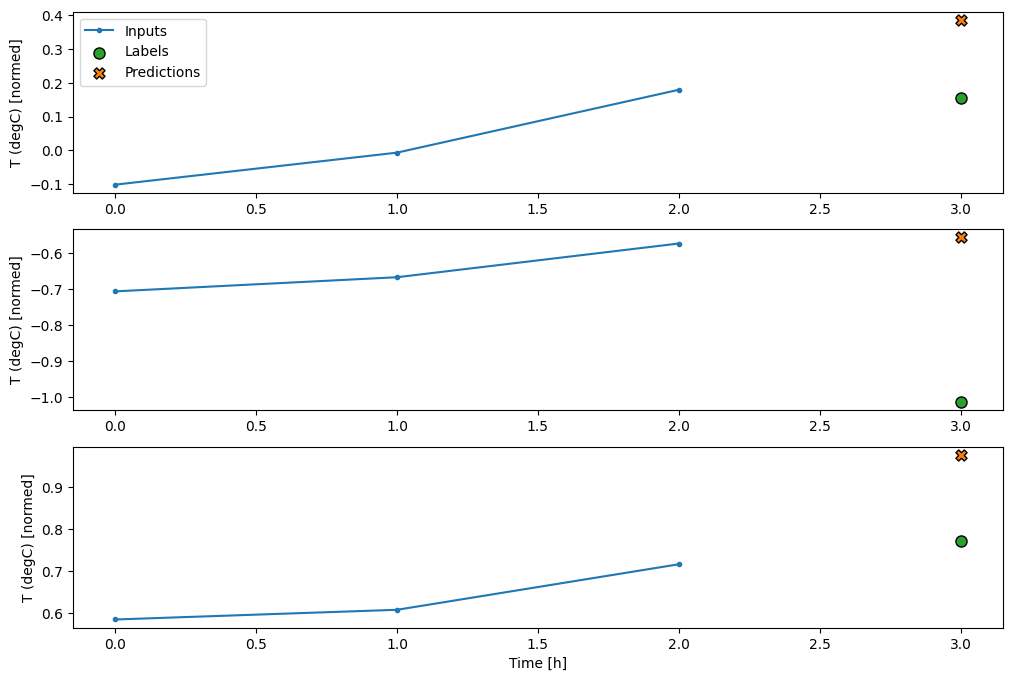

In [76]:
conv_window.plot(multi_step_dense)

In [77]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters= 32, kernel_size = (conv_width), activation = "relu"),
    tf.keras.layers.Dense(units = 32, activation = "relu"),
    tf.keras.layers.Dense(units = 1)
])
history = compile_and_fit(conv_model, conv_window)
val_performance['Conv model'] = conv_model.evaluate(conv_window.val)
test_preformrance['Conv model'] = conv_model.evaluate(conv_window.test)

219/219 [==============================] - 1s 3ms/step - loss: 0.0091 - mean_absolute_error: 0.0714


In [78]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units = 1)
])
history = compile_and_fit(lstm_model, conv_window)
val_performance['LSTM Model'] = lstm_model.evaluate(conv_window.val)
test_preformrance['LSTM Model'] = lstm_model.evaluate(conv_window.test)

219/219 [==============================] - 1s 3ms/step - loss: 0.0171 - mean_absolute_error: 0.0943


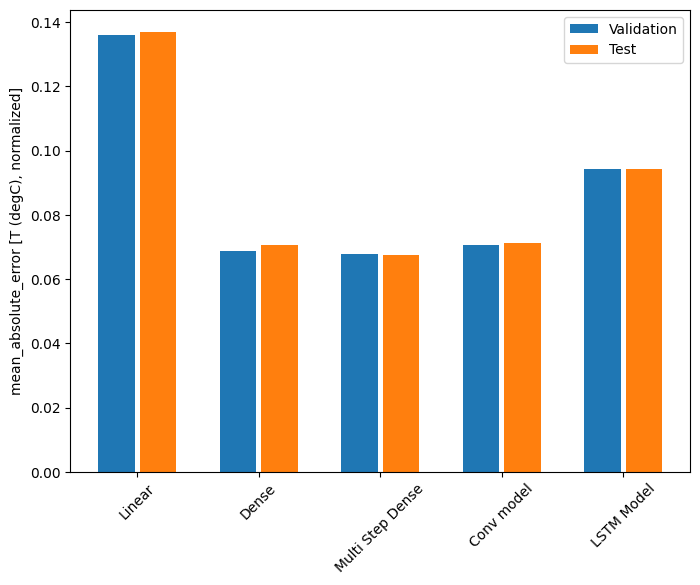

In [82]:
x = np.arange(len(test_preformrance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in test_preformrance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=test_preformrance.keys(),
                      rotation=45)
_ = plt.legend()